In [1]:
### Import data and packages

In [2]:
import os
import pickle

import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/raw.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
### Explore data

In [5]:
# Check for missing values
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

313

In [7]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
# Number of unique values
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [9]:
# Statistics of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [10]:
# Categories present in categorical features
object_columns = df.select_dtypes(include='object').columns

# Print unique values for the categorical features
for column in object_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("\n")

Unique values for Levy:
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784

In [11]:
### Data cleaning

In [12]:
interim_df = df.copy()

In [13]:
# Drop ID, Model and Levy
interim_df.drop(['ID','Model','Levy'], axis=1, inplace=True)

In [14]:
# Make Engine volume numerical and create extra feature turbo.
numerical_values = []
turbo_indicator = []
engine_volume = interim_df['Engine volume']
for value in engine_volume:
    if 'Turbo' in value:
        numerical_values.append(float(value.split()[0]))
        turbo_indicator.append('Yes')
    else:
        numerical_values.append(float(value))
        turbo_indicator.append('No')

temp_df = pd.DataFrame({'EngineVolume': numerical_values, 'Turbo': turbo_indicator})
interim_df = pd.concat([interim_df, temp_df], axis=1)
interim_df.drop(['Engine volume'], axis=1, inplace=True)

In [15]:
# Make Mileage numerical
interim_df['Mileage_km'] = [int(value.split()[0]) for value in interim_df['Mileage']]
interim_df.drop(['Mileage'], axis=1, inplace=True)

In [16]:
# Change Prod. year to years (from current date)
current_year = datetime.datetime.now().year
interim_df['years'] = current_year - interim_df['Prod. year']
interim_df.drop(['Prod. year'], axis=1, inplace=True)

In [17]:
# Remove significant extreme outliers from the dataset
# We will set multiplier=3 to capture them (we can adjust the multiplier)
def get_outliers_index(data, feature):
    # Calculate the IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds 
    #(4.5 in order to detect outliers significantly far from the median )
    lower_bound = Q1 - 4.5 * IQR
    upper_bound = Q3 + 4.5 * IQR

    # Identify extreme outliers
    extreme_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    return extreme_outliers[[feature]].index

In [18]:
print("Shape before removing outliers:", interim_df.shape)
num_features = ['Price', 'EngineVolume', 'Mileage_km']
for feature in num_features:
    remove_lines = get_outliers_index(interim_df,feature)
    interim_df.drop(remove_lines,inplace=True)
print("Shape after removing outliers:", interim_df.shape)

Shape before removing outliers: (19237, 16)
Shape after removing outliers: (18919, 16)


In [19]:
print('Missing values:\n', interim_df.isna().sum())
print('Duplicated values:', interim_df.duplicated().sum())

Missing values:
 Price               0
Manufacturer        0
Category            0
Leather interior    0
Fuel type           0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
EngineVolume        0
Turbo               0
Mileage_km          0
years               0
dtype: int64
Duplicated values: 3482


In [20]:
interim_df.drop_duplicates(inplace=True)
print('Duplicated values:', interim_df.duplicated().sum())

Duplicated values: 0


In [21]:
# Save file
interim_df.to_csv('data/interim.csv', index=False)

In [22]:
### Visualizations
df = pd.read_csv('data/interim.csv')

In [23]:
def num_univ_plot(data, feature):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram - {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Boxplot - {feature}')
    
    plt.show()

def cat_univ_plot(data, feature):
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Countplot - {feature}')
    plt.xticks(rotation=90)
    plt.show()

def num_biv_plot(data, feature, target='Price'):
    if feature == target: return
    plt.figure(figsize=(10,4))
    sns.scatterplot(data=data, y=target, x=feature)
    plt.title(f'Scatterplot - {feature} vs {target}')
    plt.show()

def cat_biv_plot(data, feature, target='Price'):
    plt.figure(figsize=(10,4))
    sns.boxplot(data=data, y=target, x=feature, hue=feature)
    plt.title(f'Boxplot - {feature} vs {target}')
    plt.xticks(rotation=90)
    plt.show()

num_features = df.select_dtypes(include='number').columns
cat_features = df.select_dtypes(include='object').columns


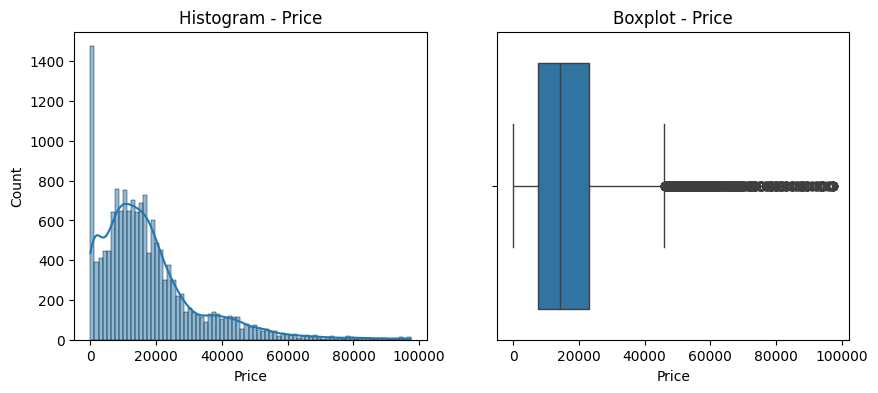

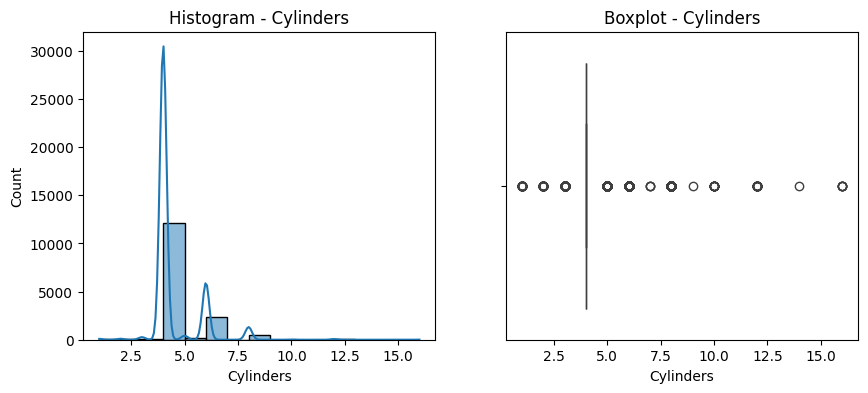

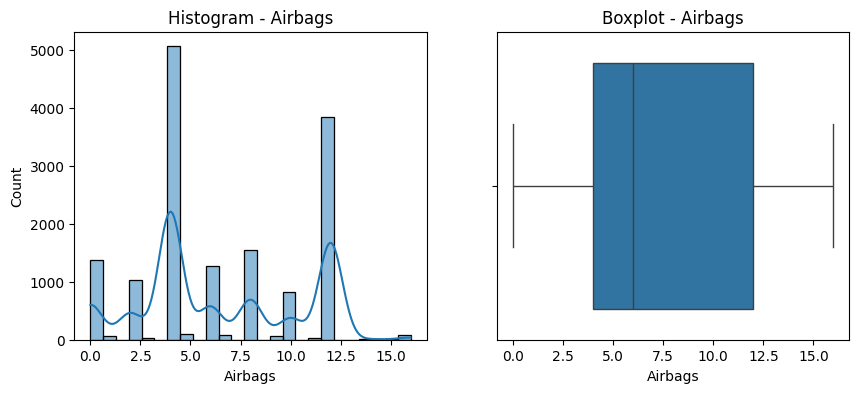

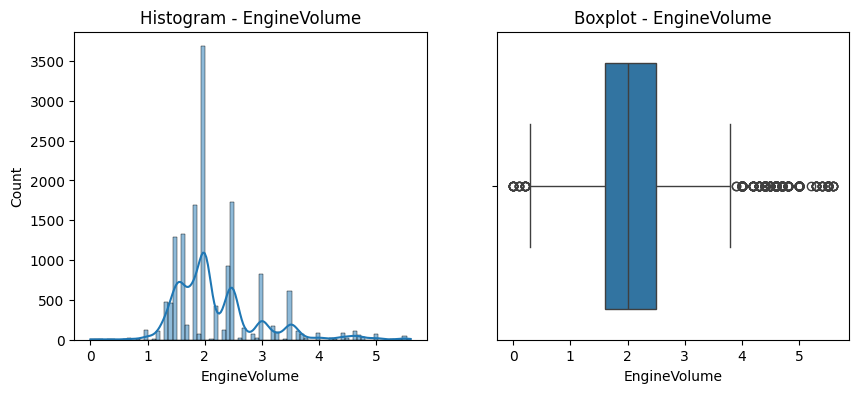

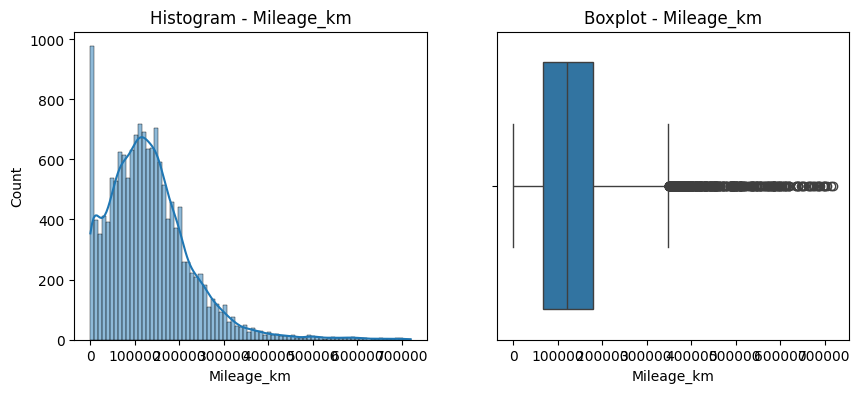

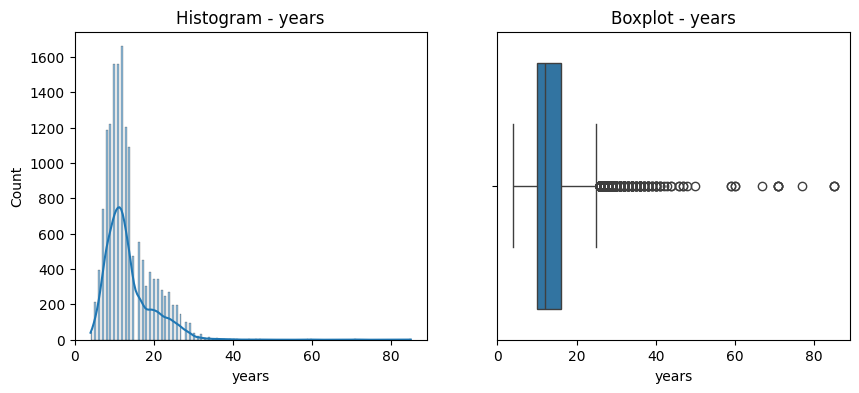

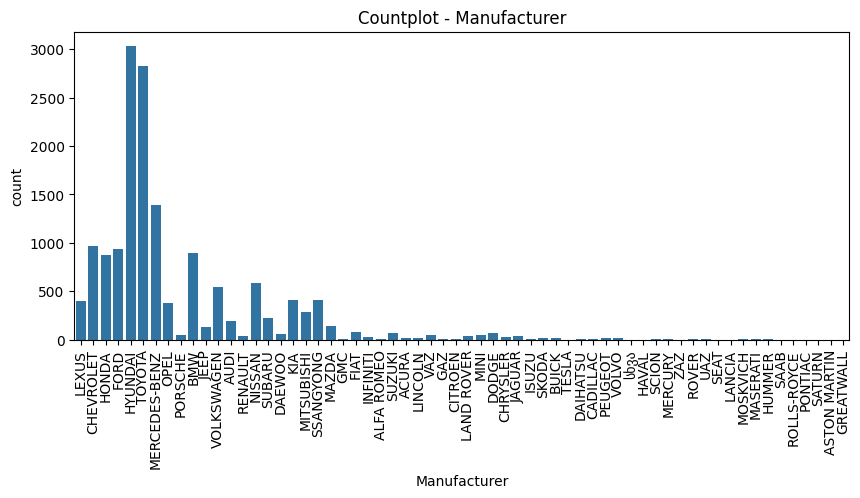

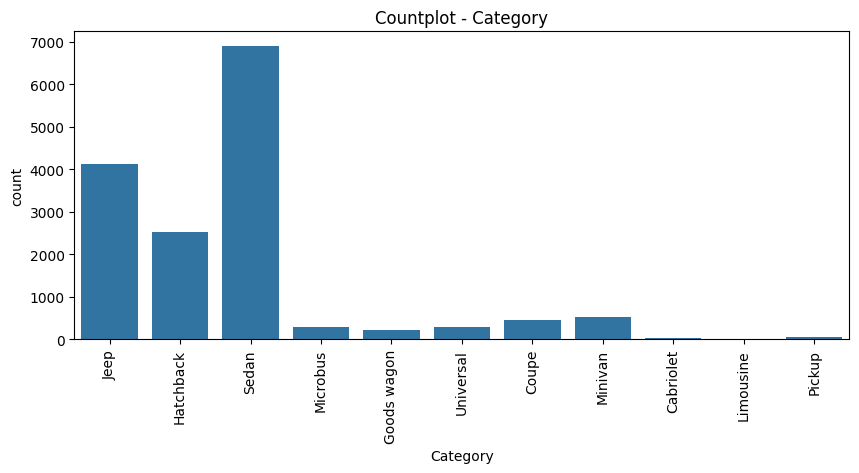

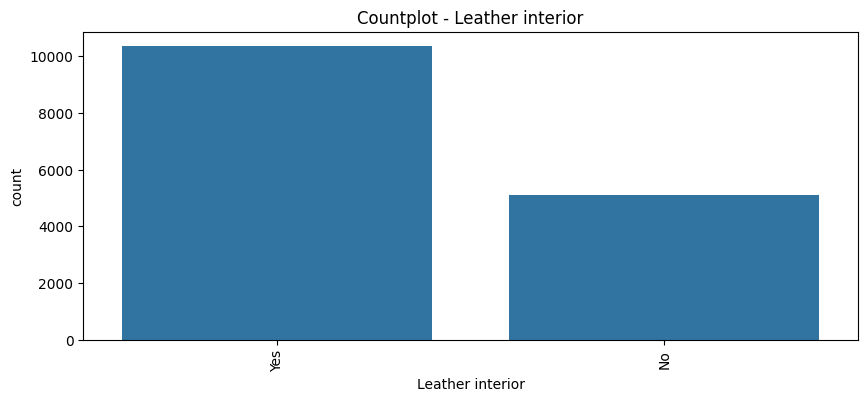

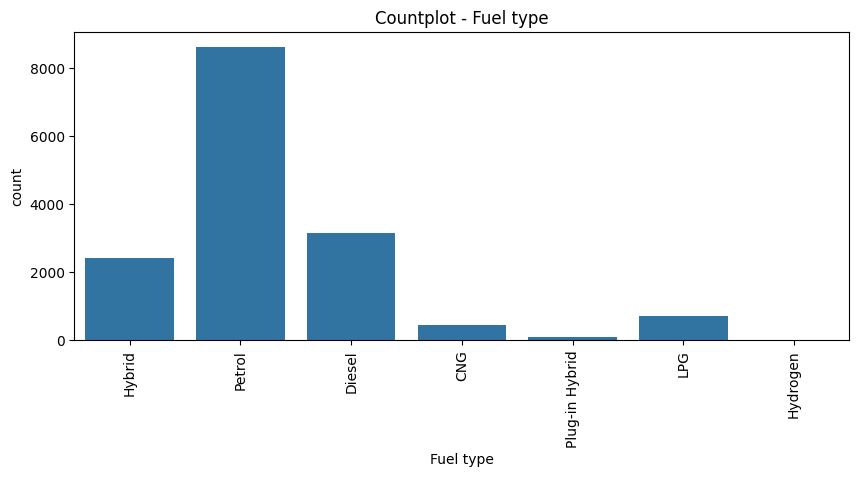

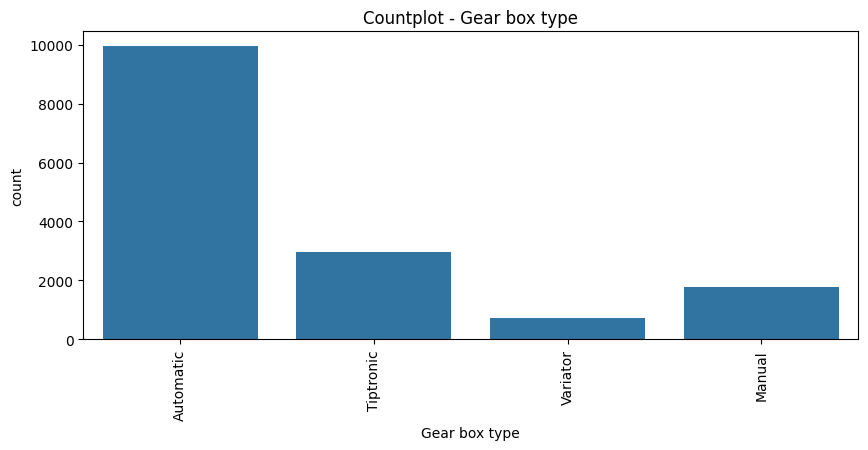

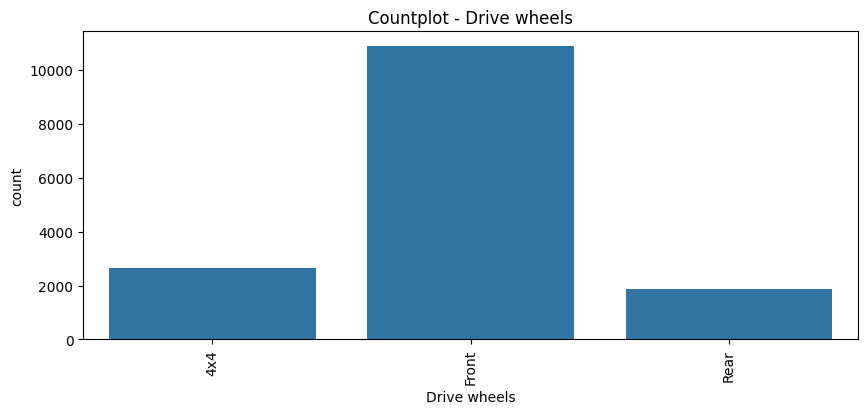

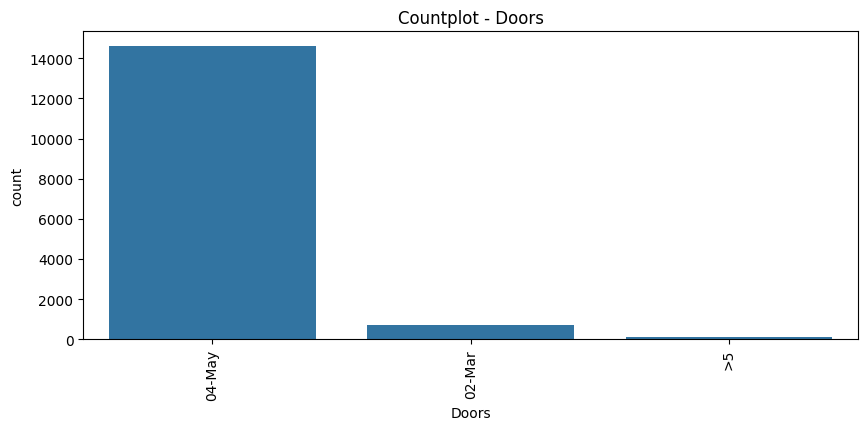

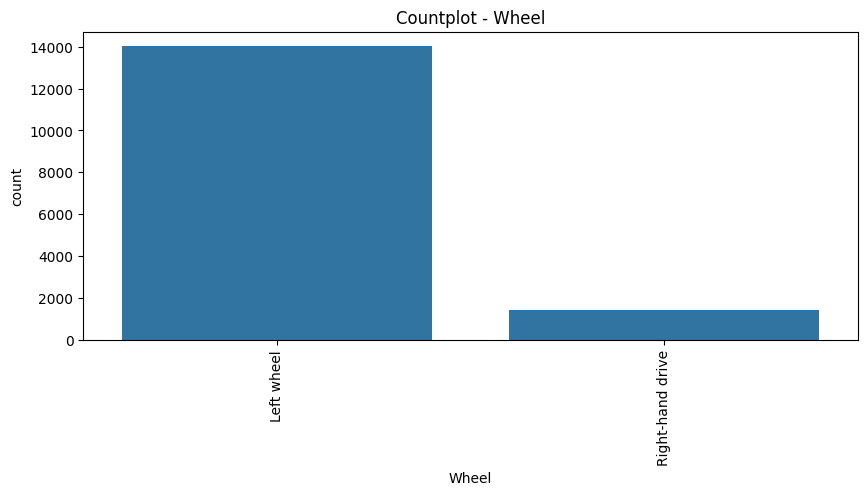

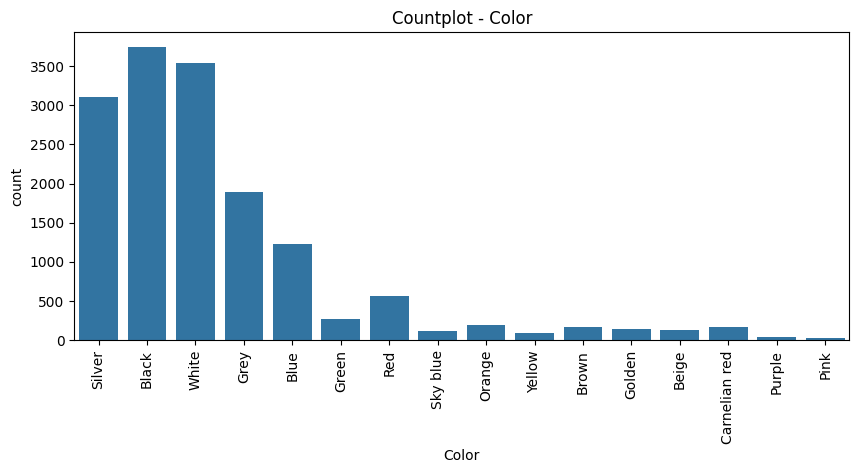

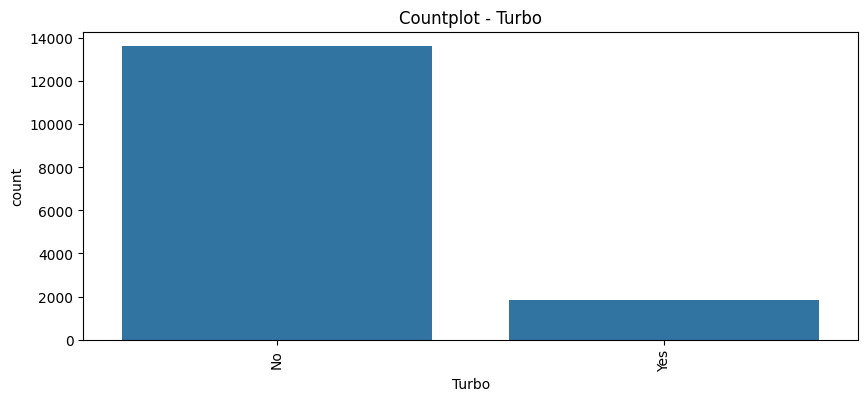

In [24]:
# Univariate analysis
for feature in num_features:
    num_univ_plot(df, feature)

for feature in cat_features:
    cat_univ_plot(df, feature)

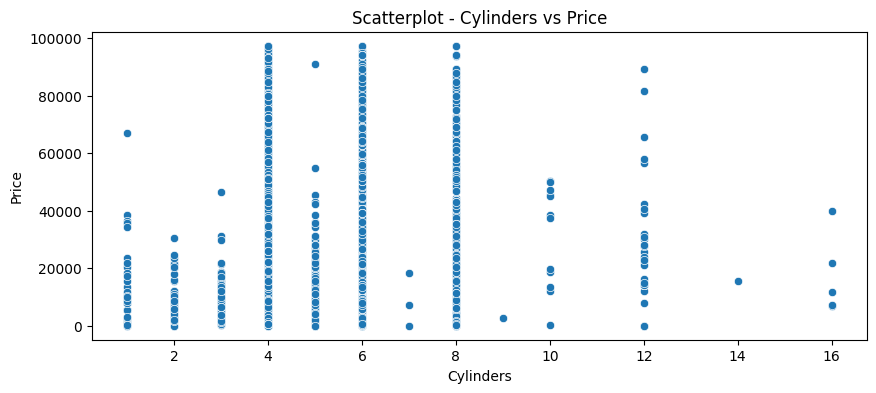

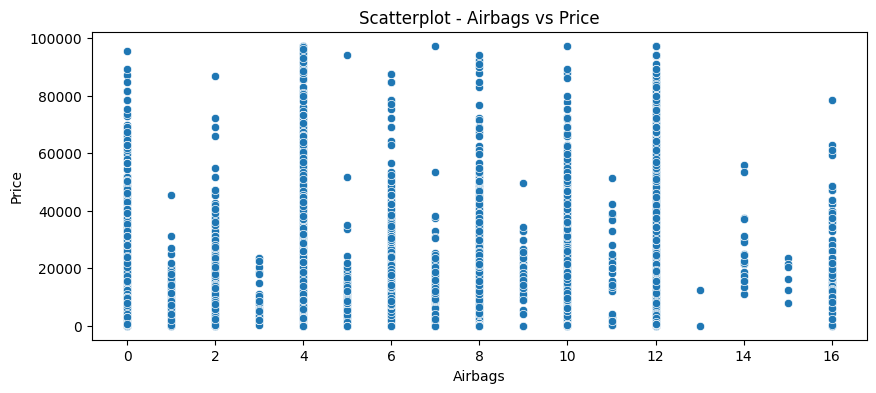

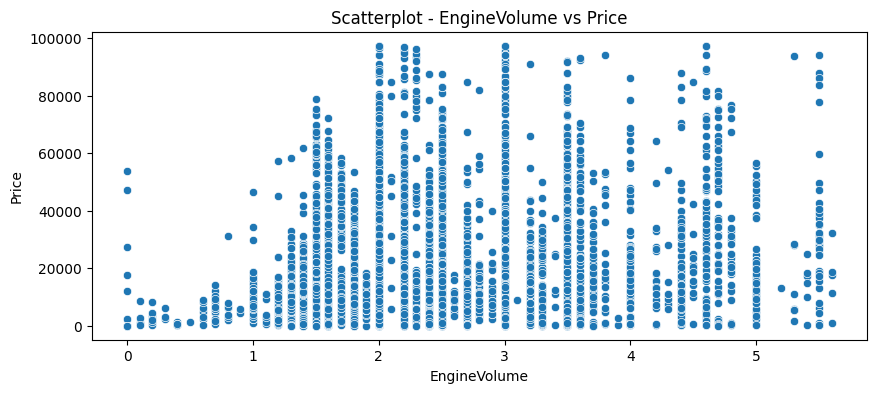

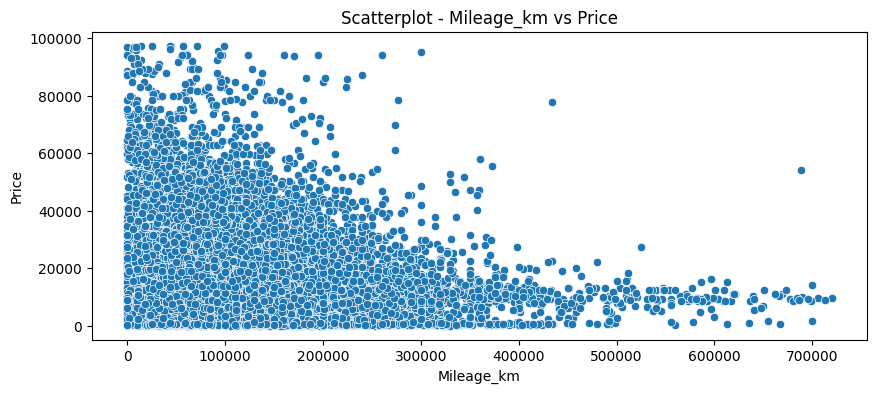

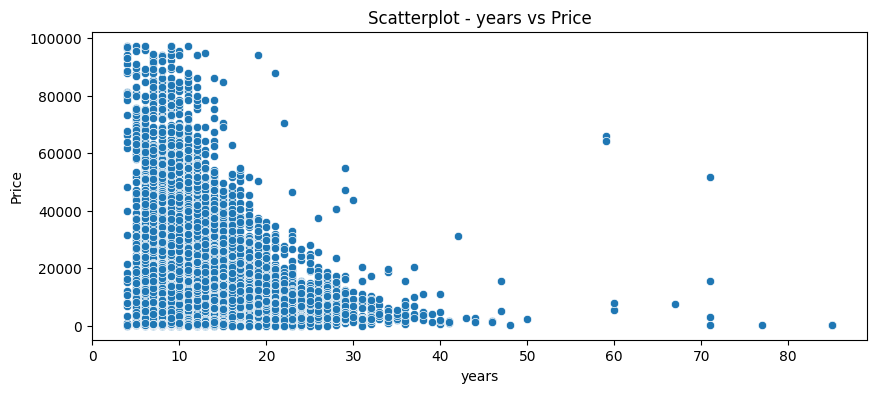

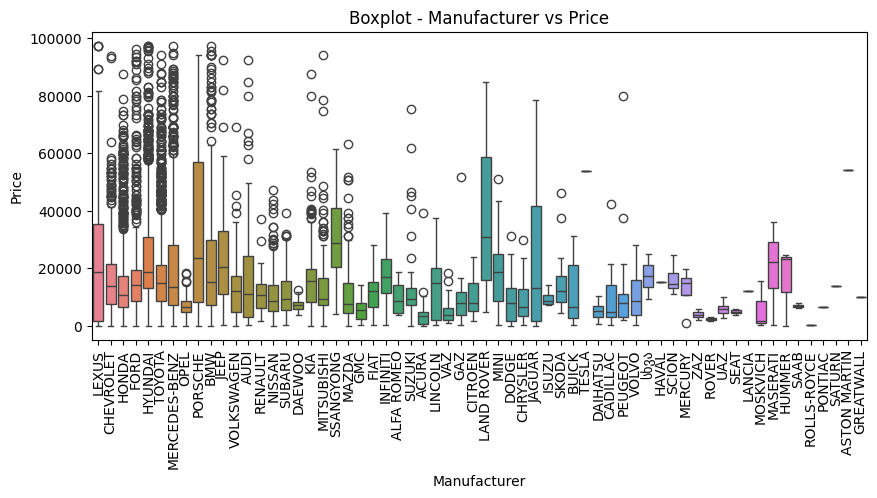

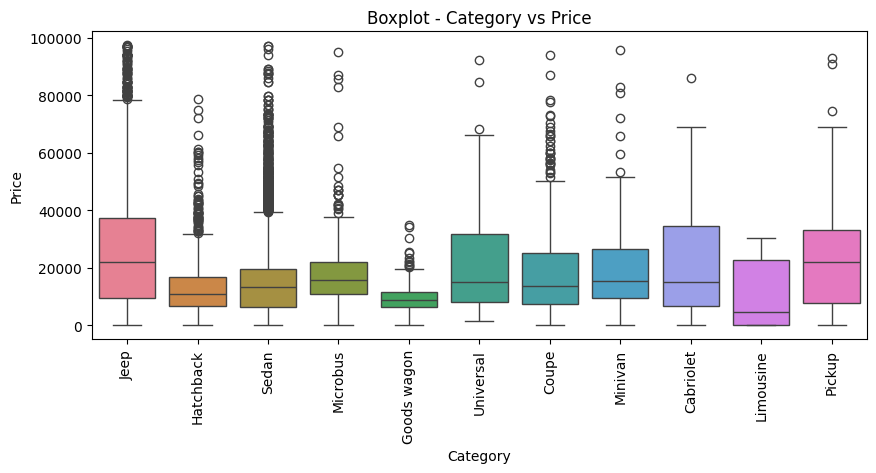

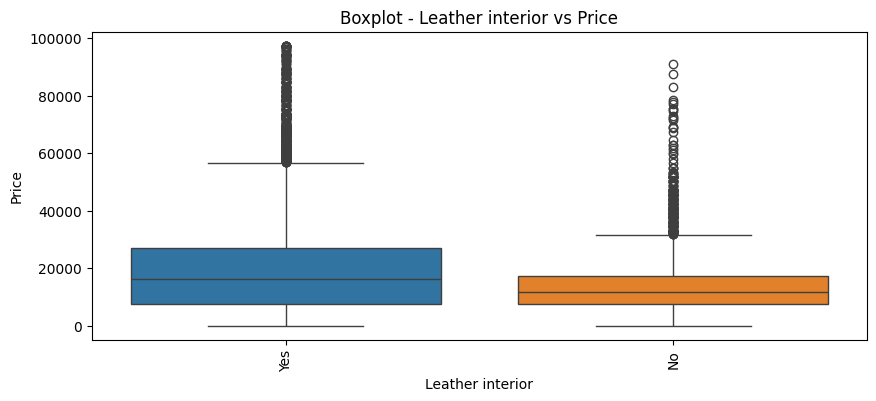

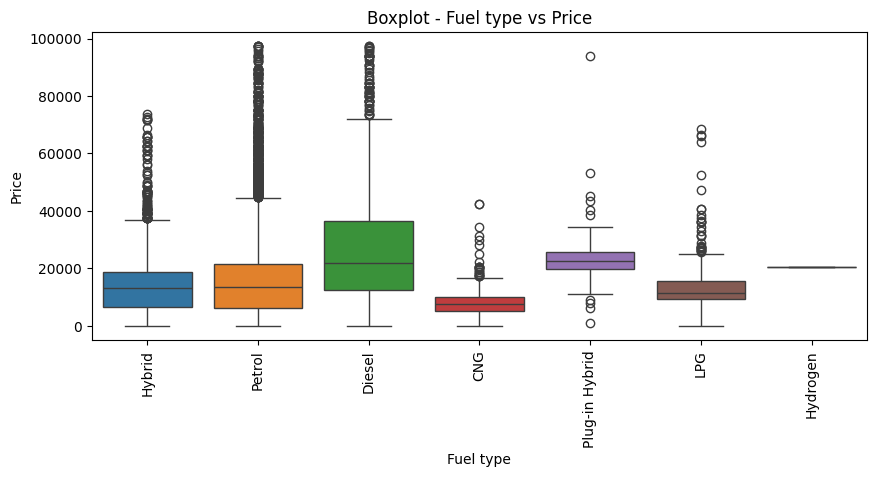

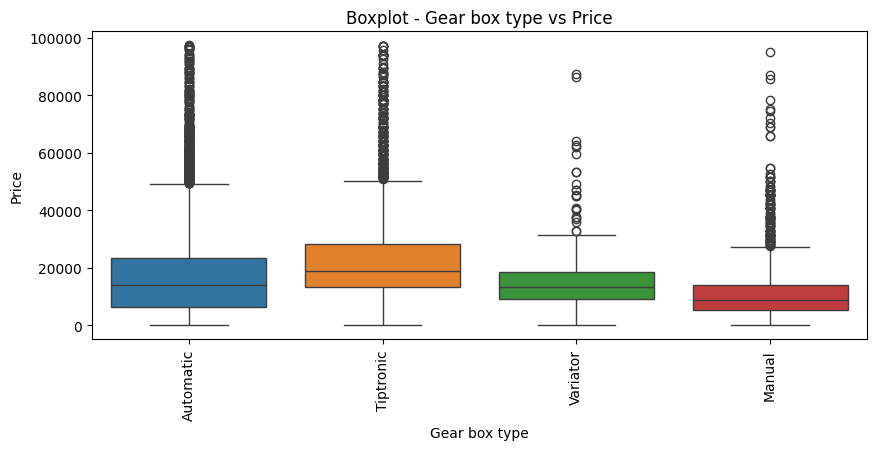

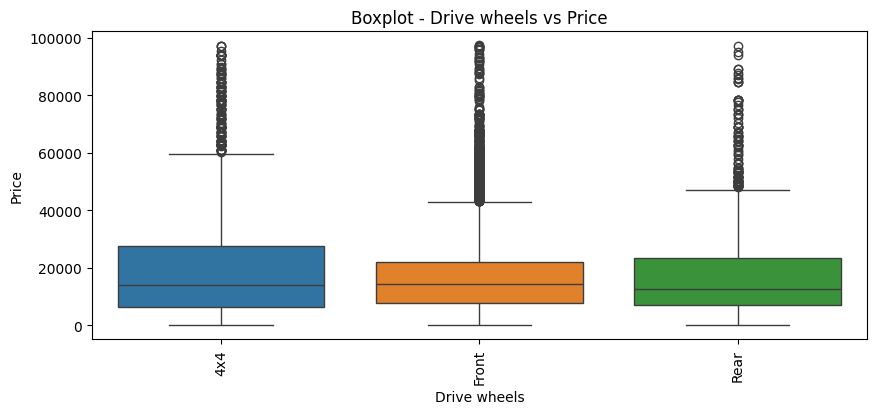

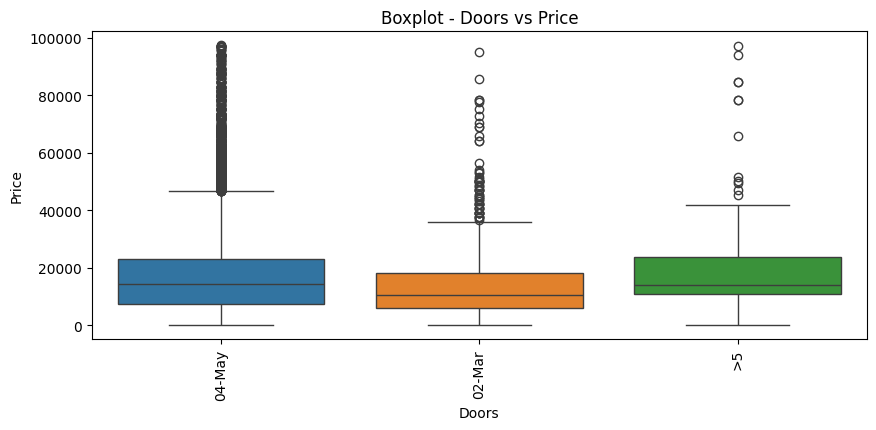

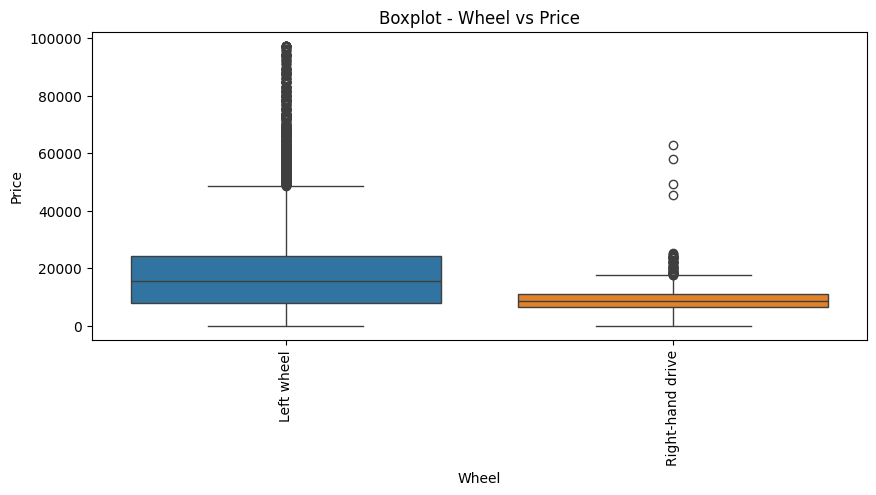

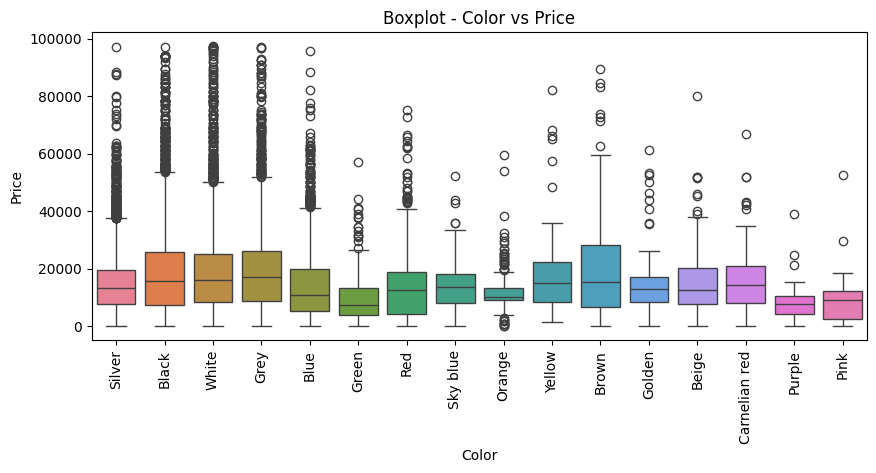

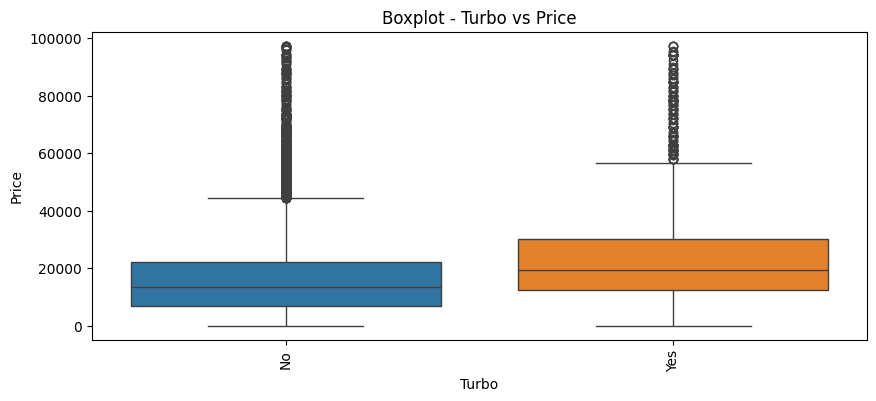

In [25]:
# Univariate analysis
for feature in num_features:
    num_biv_plot(df, feature)

for feature in cat_features:
    cat_biv_plot(df, feature)

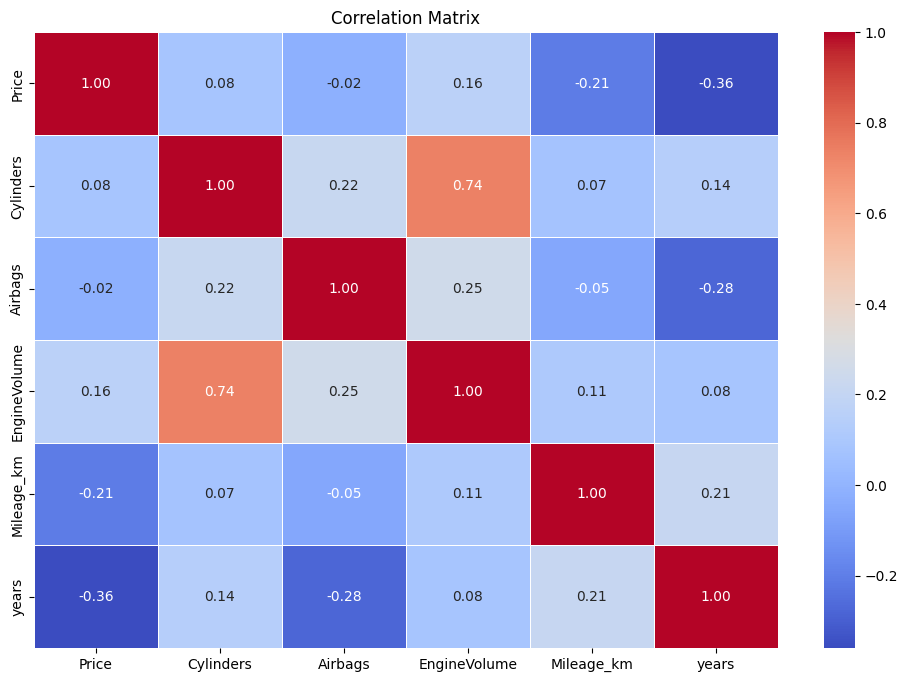

In [26]:
# Correlation map
corr_matrix = interim_df[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
### Feature engineering

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F


In [29]:
df = pd.read_csv('data/interim.csv')
df.head()

,Price,Manufacturer,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,Turbo,Mileage_km,years
0,13328,LEXUS,Jeep,Yes,Hybrid,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,No,186005,14
1,16621,CHEVROLET,Jeep,No,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,No,192000,13
2,8467,HONDA,Hatchback,No,Petrol,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,No,200000,18
3,3607,FORD,Jeep,Yes,Hybrid,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,No,168966,13
4,11726,HONDA,Hatchback,Yes,Petrol,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,No,91901,10


In [30]:
# Get the features
target_feature = 'Price'
num_features = df.drop(['Price'], axis=1).select_dtypes(include='number').columns
cat_features = df.select_dtypes(include='object').columns
print('Numerical features:', num_features)
print('Categorical features:', cat_features)

Numerical features: Index(['Cylinders', 'Airbags', 'EngineVolume', 'Mileage_km', 'years'], dtype='object')
Categorical features: Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Turbo'],
      dtype='object')


In [31]:
# Label encoding for categorical features
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])
df.head()

,Price,Manufacturer,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,Turbo,Mileage_km,years
0,13328,29,4,1,2,6.0,0,0,1,0,12,12,3.5,0,186005,14
1,16621,7,4,0,5,6.0,2,0,1,0,1,8,3.0,0,192000,13
2,8467,19,3,0,5,4.0,3,1,1,1,1,2,1.3,0,200000,18
3,3607,14,4,1,2,4.0,0,0,1,0,14,0,2.5,0,168966,13
4,11726,19,3,1,5,4.0,0,1,1,0,12,4,1.3,0,91901,10


In [32]:
def save_object(path, filename, data):
    with open(os.path.join(path, filename), 'wb') as f:
        pickle.dump(data, f)

path = 'data/'
save_object(path, 'encoder.pkl', lbl_encoders)

In [33]:
# Stack them and convert into tensor
cat_arr = df[cat_features].to_numpy()
cat_tensor = torch.tensor(cat_arr, dtype=torch.int64)
cat_tensor

tensor([[29,  4,  1,  ...,  0, 12,  0],
        [ 7,  4,  0,  ...,  0,  1,  0],
        [19,  3,  0,  ...,  1,  1,  0],
        ...,
        [21,  9,  1,  ...,  0, 11,  0],
        [21,  4,  1,  ...,  0,  7,  0],
        [21,  9,  1,  ...,  0, 14,  0]])

In [34]:
# Numerical features
df[num_features]

,Cylinders,Airbags,EngineVolume,Mileage_km,years
0,6.0,12,3.5,186005,14
1,6.0,8,3.0,192000,13
2,4.0,2,1.3,200000,18
3,4.0,0,2.5,168966,13
4,4.0,4,1.3,91901,10
...,...,...,...,...,...
15432,4.0,12,1.8,307325,13
15433,4.0,5,2.0,300000,25
15434,4.0,8,2.4,161600,13
15435,4.0,4,2.0,116365,14


In [35]:
# Stack them and convert into tensor
num_arr = df[num_features].to_numpy()
num_tensor = torch.tensor(num_arr, dtype=torch.float)
num_tensor

tensor([[6.0000e+00, 1.2000e+01, 3.5000e+00, 1.8600e+05, 1.4000e+01],
        [6.0000e+00, 8.0000e+00, 3.0000e+00, 1.9200e+05, 1.3000e+01],
        [4.0000e+00, 2.0000e+00, 1.3000e+00, 2.0000e+05, 1.8000e+01],
        ...,
        [4.0000e+00, 8.0000e+00, 2.4000e+00, 1.6160e+05, 1.3000e+01],
        [4.0000e+00, 4.0000e+00, 2.0000e+00, 1.1636e+05, 1.4000e+01],
        [4.0000e+00, 1.2000e+01, 2.4000e+00, 1.8692e+05, 1.2000e+01]])

In [36]:
df[target_feature]

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
15432      470
15433     8467
15434    15681
15435    26108
15436      470
Name: Price, Length: 15437, dtype: int64

In [37]:
### add target feature to tensor
target_arr = df[target_feature].to_numpy()
y_tensor = torch.tensor(target_arr, dtype=torch.float).reshape(-1,1)
y_tensor

tensor([[13328.],
        [16621.],
        [ 8467.],
        ...,
        [15681.],
        [26108.],
        [  470.]])

In [38]:
print("Original data frame shape:", df.shape)
print('Numerical tensor shape:',num_tensor.shape)
print('Categorical tensor shape:',cat_tensor.shape)
print('Target tensor shape:',y_tensor.shape)

Original data frame shape: (15437, 16)
Numerical tensor shape: torch.Size([15437, 5])
Categorical tensor shape: torch.Size([15437, 10])
Target tensor shape: torch.Size([15437, 1])


In [39]:
# Create the embedding size for categorical features
cat_dims = [len(df[feature].unique()) for feature in cat_features]
# Rule of thumb for embedding dim (by fastai)
embedding_dim = [(x, min(50, (x+1)//2)) for x in cat_dims]
print([len(df[feature].unique()) for feature in cat_features])
print(embedding_dim)

[62, 11, 2, 7, 4, 3, 3, 2, 16, 2]
[(62, 31), (11, 6), (2, 1), (7, 4), (4, 2), (3, 2), (3, 2), (2, 1), (16, 8), (2, 1)]


In [58]:
torch.save(cat_tensor, 'data/cat_tensor.pt')
torch.save(num_tensor, 'data/num_tensor.pt')
torch.save(y_tensor, 'data/y_tensor.pt')

In [41]:
### Model Creation

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_dim, layers, dout=0.5):
        super().__init__()
        # Create embedding layer
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dim])
        # Apply dropout (prevent overfitting)
        self.emb_drop = nn.Dropout(dout)
        # Apply batch normalization to numerical features
        self.bn_cont = nn.BatchNorm1d(n_cont)

        # Total dimension of embedding layers
        n_emb = sum((out for inp,out in embedding_dim))
        # Total input (embedding and continuous) 
        n_inp = n_emb + n_cont

        layerlist = []
        for i in layers:
            # Create Linear layer
            layerlist.append(nn.Linear(n_inp,i))
            # Add activation function
            layerlist.append(nn.ReLU(inplace=True))
            # Add batch normalization in the neurons
            layerlist.append(nn.BatchNorm1d(i))
            # Drop some neurons
            layerlist.append(nn.Dropout(dout))
            # The input for the next layer
            n_inp = i
        # Final layer - output layer
        layerlist.append(nn.Linear(layers[-1], out_dim))

        # Wrap the layers with Sequential
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont): 
        # Create and concat embeddings
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x_cat = torch.cat(embeddings, 1)
        # Dropout
        x_cat = self.emb_drop(x_cat)
        # Batch normalization
        x_cont = self.bn_cont(x_cont)
        # Concat all features
        x = torch.cat([x_cat, x_cont], 1)
        # Return layer with input x
        layer = self.layers(x)
        
        return layer

In [44]:
# Create model
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(num_features), 1, [128,64], dout=0.3)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(62, 31)
    (1): Embedding(11, 6)
    (2): Embedding(2, 1)
    (3): Embedding(7, 4)
    (4): Embedding(4, 2)
    (5-6): 2 x Embedding(3, 2)
    (7): Embedding(2, 1)
    (8): Embedding(16, 8)
    (9): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.3, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=63, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [45]:
# Loss function and Optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

c:\Users\idale\anaconda3\envs\gpuenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
df.shape

(15437, 16)

In [47]:
batch_size = 15437
test_size = int(batch_size*0.2)
test_size

3087

In [48]:
# Train test split
#cat_train = cat_tensor[:batch_size-test_size]
#cat_test = cat_tensor[batch_size-test_size:batch_size]
#num_train = num_tensor[:batch_size-test_size]
#num_test = num_tensor[batch_size-test_size:batch_size]
#y_train = y_tensor[:batch_size-test_size]
#y_test = y_tensor[batch_size-test_size:batch_size]

#print((len(cat_train),len(cat_test)),
#(len(num_train),len(num_test)),
#(len(y_train),len(y_test)))

In [49]:
# Train test split with suffle suffle
# Create indices for shuffling
indices = torch.randperm(batch_size)

# Shuffle cat_tensor, num_tensor, and y_tensor using the indices
shuffled_cat_tensor = cat_tensor[indices]
shuffled_num_tensor = num_tensor[indices]
shuffled_y_tensor = y_tensor[indices]

# Split the shuffled tensors into train and test sets
cat_train = shuffled_cat_tensor[:batch_size-test_size]
cat_test = shuffled_cat_tensor[batch_size-test_size:batch_size]
num_train = shuffled_num_tensor[:batch_size-test_size]
num_test = shuffled_num_tensor[batch_size-test_size:batch_size]
y_train = shuffled_y_tensor[:batch_size-test_size]
y_test = shuffled_y_tensor[batch_size-test_size:batch_size]

print((len(cat_train),len(cat_test)),
(len(num_train),len(num_test)),
(len(y_train),len(y_test)))

(12350, 3087) (12350, 3087) (12350, 3087)


In [50]:
epochs = 3000
final_losses = []
for i in range(epochs):
    i=i+1
    # Make the prediction 
    y_pred=model(cat_train, num_train)
    # get the loss (as RMSE)
    loss = torch.sqrt(loss_function(y_pred, y_train))
    final_losses.append(loss)
    if (i + 1) % 10 == 0:
        print("Epoch number: {}, loss: {}".format(i,loss.item()))
    # Clear gradient of optimized tensors
    optimizer.zero_grad()
    # Compute gradients of the loss
    loss.backward()
    #Update model params
    optimizer.step()
    


Epoch number: 9, loss: 23504.775390625
Epoch number: 19, loss: 23499.052734375
Epoch number: 29, loss: 23490.18359375
Epoch number: 39, loss: 23477.875
Epoch number: 49, loss: 23462.072265625
Epoch number: 59, loss: 23442.771484375
Epoch number: 69, loss: 23419.197265625
Epoch number: 79, loss: 23391.26171875
Epoch number: 89, loss: 23359.12109375
Epoch number: 99, loss: 23323.390625
Epoch number: 109, loss: 23282.482421875
Epoch number: 119, loss: 23237.44140625
Epoch number: 129, loss: 23186.359375
Epoch number: 139, loss: 23132.384765625
Epoch number: 149, loss: 23071.154296875
Epoch number: 159, loss: 23006.240234375
Epoch number: 169, loss: 22938.72265625
Epoch number: 179, loss: 22865.064453125
Epoch number: 189, loss: 22788.6328125
Epoch number: 199, loss: 22707.44140625
Epoch number: 209, loss: 22614.55078125
Epoch number: 219, loss: 22524.171875
Epoch number: 229, loss: 22423.16015625
Epoch number: 239, loss: 22324.703125
Epoch number: 249, loss: 22221.193359375
Epoch number: 

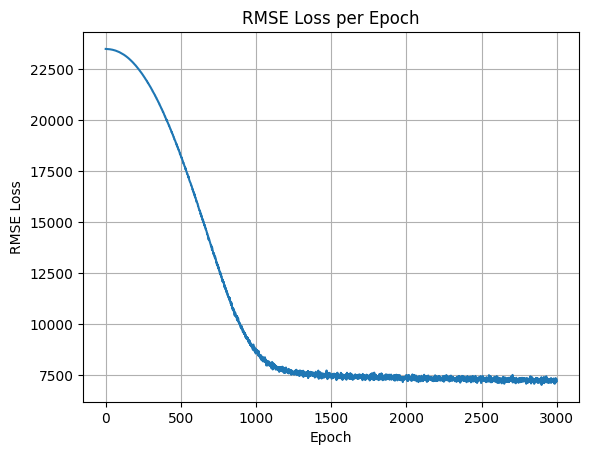

In [51]:
# Convert from tensor to numpy
final_losses_numpy = [loss.detach().numpy() for loss in final_losses]

# Plot epochs and losses
plt.plot(range(epochs), final_losses_numpy)
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch')
plt.title('RMSE Loss per Epoch')
plt.grid(True)
plt.show()

In [52]:
# Validate the test data
y_pred=""
with torch.no_grad():
    y_pred=model(cat_test,num_test)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 9220.1103515625


In [53]:
# Dataframe with test, prediction and their difference in price
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head(10)

,Test,Prediction,Difference
0,21326.0,10065.856445,11260.143555
1,17249.0,14425.243164,2823.756836
2,55638.0,29366.695312,26271.304688
3,16308.0,15163.159180,1144.840820
4,4234.0,4061.672607,172.327393
5,43278.0,30947.939453,12330.060547
6,42965.0,41720.519531,1244.480469
7,5331.0,6766.234375,-1435.234375
8,1019.0,1550.534424,-531.534424
9,3763.0,18722.380859,-14959.380859


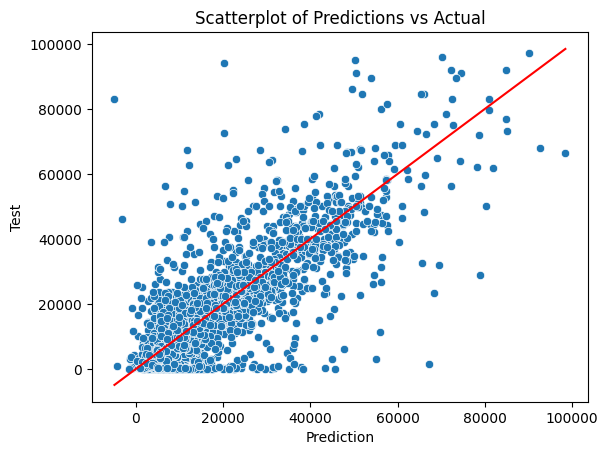

In [54]:
# Plot scatterplot pred vs actual
sns.scatterplot(data=final_output, x='Prediction', y='Test')
plt.title('Scatterplot of Predictions vs Actual')
plt.plot([final_output['Prediction'].min(), final_output['Prediction'].max()],
         [final_output['Prediction'].min(), final_output['Prediction'].max()], color='red')
plt.show()

In [55]:
torch.save(model,'data/HousePrice.pt')
torch.save(model.state_dict(),'data/HouseWeights.pt')

In [56]:
### TODO Make mini batches
### TODO Add validation